In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from IPython.display import IFrame
from folium import plugins
from datetime import datetime as dt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import bokeh
import geopandas as gpd
import pandas_bokeh
from pyproj import Proj
import math
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
pd.options.display.max_rows = 4000

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
import shap
shap.initjs()


from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics

import lightgbm as lgb

In [2]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Nota Verdadeira')
    plt.xlabel('Nota Prevista\nAcurácia={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [3]:
def plot_confusion_matrix5(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Nota Verdadeira')
    plt.xlabel('Nota Prevista\nAcurácia={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [4]:
base = pd.read_csv('train.csv')
base.head()

,order_id,prazo_entrega_esperado,prazo_entrega,price,freight_value,capital,payment_sequential,product_name_lenght,product_description_lenght,product_photos_qty,...,product_category_name_portateis_casa_forno_e_cafe,product_category_name_portateis_cozinha_e_preparadores_de_alimentos,product_category_name_relogios_presentes,product_category_name_seguros_e_servicos,product_category_name_sinalizacao_e_seguranca,product_category_name_tablets_impressao_imagem,product_category_name_telefonia,product_category_name_telefonia_fixa,product_category_name_utilidades_domesticas,delta
0,e481f51cbdc54678b7cc49136f2d6af7,15.544063,8.436574,29.99,8.72,1,3,40.0,268.0,4.0,...,0,0,0,0,0,0,0,0,1,7.107488
1,53cdb2fc8bc7dce0b6741e2150273451,19.137766,13.782037,118.70,22.76,0,1,29.0,178.0,1.0,...,0,0,0,0,0,0,0,0,0,5.355729
2,47770eb9100c2d0c44946d9cf07ec65d,26.639711,9.394213,159.90,19.22,0,1,46.0,232.0,1.0,...,0,0,0,0,0,0,0,0,0,17.245498
3,949d5b44dbf5de918fe9c16f97b45f8a,26.188819,13.208750,45.00,27.20,0,1,59.0,468.0,3.0,...,0,0,0,0,0,0,0,0,0,12.980069
4,ad21c59c0840e6cb83a9ceb5573f8159,12.112049,2.873877,19.90,8.72,0,1,38.0,316.0,4.0,...,0,0,0,0,0,0,0,0,0,9.238171


In [5]:
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
order_reviews.shape

(100000, 7)

In [6]:
order_reviews[order_reviews['order_id']=='03c939fd7fd3b38f8485a0f95798f1f6']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
8329,b04ed893318da5b863e878cd3d0511df,03c939fd7fd3b38f8485a0f95798f1f6,3,NaN,Um ponto negativo que achei foi a cobrança de ...,2018-03-20 00:00:00,2018-03-21 02:28:23
51931,f4bb9d6dd4fb6dcc2298f0e7b17b8e1e,03c939fd7fd3b38f8485a0f95798f1f6,4,NaN,NaN,2018-03-29 00:00:00,2018-03-30 00:29:09
70005,405eb2ea45e1dbe2662541ae5b47e2aa,03c939fd7fd3b38f8485a0f95798f1f6,3,NaN,Seria ótimo se tivesem entregue os 3 (três) pe...,2018-03-06 00:00:00,2018-03-06 19:50:32


In [7]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
parse = ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
orders = pd.read_csv('olist_orders_dataset.csv', parse_dates=parse)
orders.shape

(99441, 8)

In [9]:
orders['time_to_approval_delta'] = orders['order_approved_at'] - orders['order_purchase_timestamp']
orders['time_to_approval_min'] = orders['time_to_approval_delta'].apply(lambda x: x.total_seconds()/60)

orders['time_to_carrier_delta'] = orders['order_delivered_carrier_date'] - orders['order_approved_at'] 
orders['time_to_carrier_min'] = orders['time_to_carrier_delta'].apply(lambda x: x.total_seconds()/60)

orders['time_to_deliver_delta'] = orders['order_delivered_customer_date'] - orders['order_delivered_carrier_date'] 
orders['time_to_deliver_min'] = orders['time_to_deliver_delta'].apply(lambda x: x.total_seconds()/60)

orders['time_to_deliver_expected_delta'] = orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date'] 
orders['time_to_deliver_expected_min'] = orders['time_to_deliver_expected_delta'].apply(lambda x: x.total_seconds()/60)

In [10]:
base = base.merge(orders[['order_id', 'time_to_approval_min','time_to_carrier_min', 'time_to_deliver_min', 'time_to_deliver_expected_min']], left_on='order_id', right_on='order_id')

In [11]:
base = base.merge(order_reviews[['order_id','review_score']], left_on='order_id', right_on='order_id', how='outer')

In [12]:
base.shape

(100000, 151)

In [13]:
order_reviews['order_id'].value_counts()

df56136b8031ecd28e200bb18e6ddb2e    3
8e17072ec97ce29f0e1f111e598b0c85    3
03c939fd7fd3b38f8485a0f95798f1f6    3
c88b1d1b157a9999ce368f218a407141    3
08bf75dcf867b9f13026785053e87052    2
3ca618a967a369a20ac5f2c4e00e151a    2
3a7162d3eda153a373ed4112bdf53b32    2
03515a836bb855b03f7df9dee520a8fc    2
8c6a3fab1ed272b02f23bb7dc9061d9a    2
a979479c1af57af858b45dfd2d67ee04    2
b9e6b3135dcdfc054568883b2bcf1e5e    2
195cdd5d4a7a7137487b3d3ab71c851f    2
2e3258f81be08e497abb202cef0c0303    2
95287dc5df93f25b90309d5acddbe02e    2
9d6e7e70e068602fa740fc3163cefd3b    2
2f8f31eb2f7b6572836d662a6625c8e4    2
d14639e8e6808119a16fde091d30b2d2    2
15fc22aad8d1b227891ce61eff4128cd    2
ff850ba359507b996e8b2fbb26df8d03    2
c5132855100a12d63ed4e8ae05f9594d    2
99ced390cb3920dd78d289dcddfc6ce4    2
adbac4b12d94ba3f3e7c47dfe548fc81    2
f86e20fe6ce750c00d7ed08e8c67384f    2
94f522c26f2681ad053b999e34e7b317    2
b1e45a9d2437f4116c3ff5de92d2a527    2
e73eb0a2c088eec6c479d66ac0d910f0    2
fcde2f744949

In [14]:
base.drop(columns=(['order_id','time_to_deliver_min','time_to_deliver_min']), inplace=True)

In [15]:
base.shape

(100000, 149)

In [16]:
xgb_reg = base.copy()

# XGBOOST: Regressão

In [17]:
X_train, X_test, y_train, y_test = train_test_split(xgb_reg.drop('review_score',axis=1), 
                                                            xgb_reg['review_score'], test_size=0.20,random_state=10)

In [18]:
print(X_train.shape)
print(X_test.shape)

(80000, 148)
(20000, 148)


In [19]:
xgboost = xgb.XGBRegressor(max_depth=8, learning_rate=0.50, n_estimators=15,
                                    objective="reg:linear", subsample=0.2,
                                    colsample_bytree=0.8)
xgboost.fit(X_train,y_train)
predictions = xgboost.predict(X_test)

[00:28:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [20]:
df_xgb = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

In [21]:
df_xgb['Erro'] = df_xgb['Actual'] - df_xgb['Predicted']

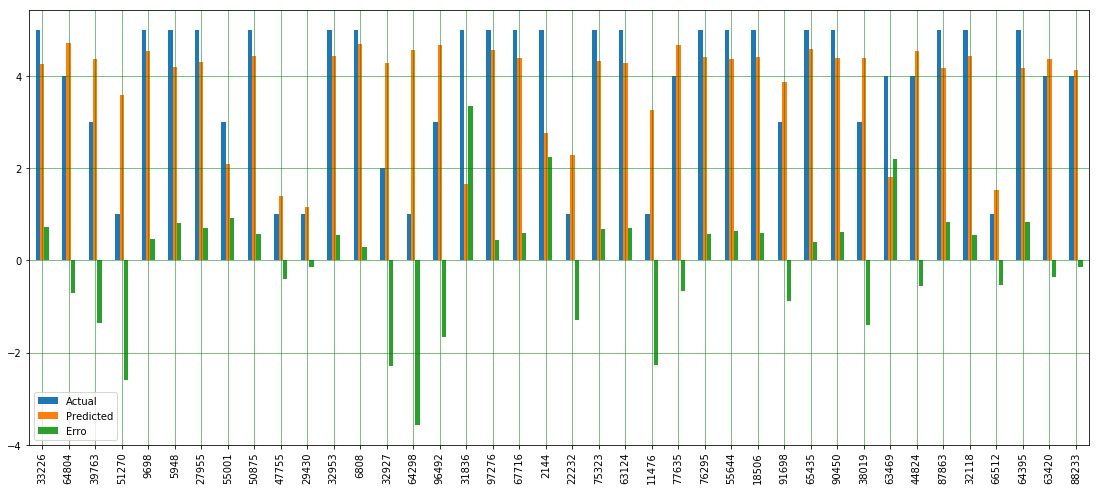

In [22]:
df_xgb.head(40).plot(kind='bar',figsize=(19,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

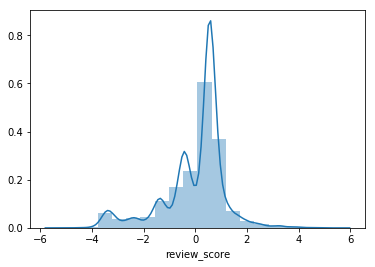

In [23]:
sns.distplot((y_test-predictions),bins=20);


In [24]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.9134717794790864
MSE: 1.5070900474216746
RMSE: 1.2276359588337558


In [25]:
print('RMSE Notas 1:', np.sqrt(metrics.mean_squared_error(df_xgb[df_xgb['Actual']==1]['Actual'], df_xgb[df_xgb['Actual']==1]['Predicted'])))
print('RMSE Notas 2:', np.sqrt(metrics.mean_squared_error(df_xgb[df_xgb['Actual']==2]['Actual'], df_xgb[df_xgb['Actual']==2]['Predicted'])))
print('RMSE Notas 3:', np.sqrt(metrics.mean_squared_error(df_xgb[df_xgb['Actual']==3]['Actual'], df_xgb[df_xgb['Actual']==3]['Predicted'])))
print('RMSE Notas 4:', np.sqrt(metrics.mean_squared_error(df_xgb[df_xgb['Actual']==4]['Actual'], df_xgb[df_xgb['Actual']==4]['Predicted'])))
print('RMSE Notas 5:', np.sqrt(metrics.mean_squared_error(df_xgb[df_xgb['Actual']==5]['Actual'], df_xgb[df_xgb['Actual']==5]['Predicted'])))

RMSE Notas 1: 2.436163803612436
RMSE Notas 2: 1.9565571781367987
RMSE Notas 3: 1.3216204584148412
RMSE Notas 4: 0.6457641916437423
RMSE Notas 5: 0.8864449221772791


In [26]:
df_xgb[(df_xgb['Actual']<=3)].shape

(4655, 3)

In [27]:
df_xgb[(df_xgb['Actual']>3)&(df_xgb['Predicted']<=3)].shape

(552, 3)

In [28]:
df_xgb[(df_xgb['Predicted']<=3)].shape

(2036, 3)

# XGBOOST: Classificação

In [29]:
class_5 = base.copy()
class_2 = base.copy()

In [30]:
class_2['nota'] = class_2['review_score'].apply(lambda x: 0 if x>=4 else 1)
class_2.drop(columns=(['review_score']),inplace=True)

In [31]:
class_2.head()

,prazo_entrega_esperado,prazo_entrega,price,freight_value,capital,payment_sequential,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,product_category_name_sinalizacao_e_seguranca,product_category_name_tablets_impressao_imagem,product_category_name_telefonia,product_category_name_telefonia_fixa,product_category_name_utilidades_domesticas,delta,time_to_approval_min,time_to_carrier_min,time_to_deliver_expected_min,nota
0,15.544063,8.436574,29.99,8.72,1.0,3.0,40.0,268.0,4.0,500.0,...,0.0,0.0,0.0,0.0,1.0,7.107488,10.700000,3407.750000,10234.783333,0
1,19.137766,13.782037,118.70,22.76,0.0,1.0,29.0,178.0,1.0,400.0,...,0.0,0.0,0.0,0.0,0.0,5.355729,1842.833333,666.550000,7712.250000,0
2,26.639711,9.394213,159.90,19.22,0.0,1.0,46.0,232.0,1.0,420.0,...,0.0,0.0,0.0,0.0,0.0,17.245498,16.566667,294.616667,24833.516667,0
3,26.188819,13.208750,45.00,27.20,0.0,1.0,59.0,468.0,3.0,450.0,...,0.0,0.0,0.0,0.0,0.0,12.980069,17.883333,5394.000000,18691.300000,0
4,12.112049,2.873877,19.90,8.72,0.0,1.0,38.0,316.0,4.0,250.0,...,0.0,0.0,0.0,0.0,0.0,9.238171,61.833333,1286.083333,13302.966667,0


In [32]:
class_2['nota'].value_counts()

0    76620
1    23380
Name: nota, dtype: int64

In [33]:
class_5['review_score'].value_counts()

5    57420
4    19200
1    11858
3     8287
2     3235
Name: review_score, dtype: int64

In [34]:
class_5.head()

,prazo_entrega_esperado,prazo_entrega,price,freight_value,capital,payment_sequential,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,product_category_name_sinalizacao_e_seguranca,product_category_name_tablets_impressao_imagem,product_category_name_telefonia,product_category_name_telefonia_fixa,product_category_name_utilidades_domesticas,delta,time_to_approval_min,time_to_carrier_min,time_to_deliver_expected_min,review_score
0,15.544063,8.436574,29.99,8.72,1.0,3.0,40.0,268.0,4.0,500.0,...,0.0,0.0,0.0,0.0,1.0,7.107488,10.700000,3407.750000,10234.783333,4
1,19.137766,13.782037,118.70,22.76,0.0,1.0,29.0,178.0,1.0,400.0,...,0.0,0.0,0.0,0.0,0.0,5.355729,1842.833333,666.550000,7712.250000,4
2,26.639711,9.394213,159.90,19.22,0.0,1.0,46.0,232.0,1.0,420.0,...,0.0,0.0,0.0,0.0,0.0,17.245498,16.566667,294.616667,24833.516667,5
3,26.188819,13.208750,45.00,27.20,0.0,1.0,59.0,468.0,3.0,450.0,...,0.0,0.0,0.0,0.0,0.0,12.980069,17.883333,5394.000000,18691.300000,5
4,12.112049,2.873877,19.90,8.72,0.0,1.0,38.0,316.0,4.0,250.0,...,0.0,0.0,0.0,0.0,0.0,9.238171,61.833333,1286.083333,13302.966667,5


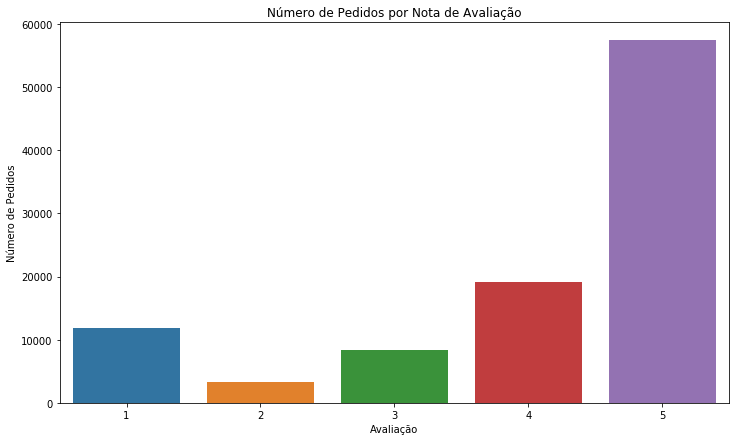

In [35]:
plt.figure(figsize=(12,7))

sns.countplot(class_5['review_score'], order=class_5['review_score'].value_counts().index.sort_values())
plt.title('Número de Pedidos por Nota de Avaliação')
plt.xlabel('Avaliação')
plt.ylabel('Número de Pedidos');

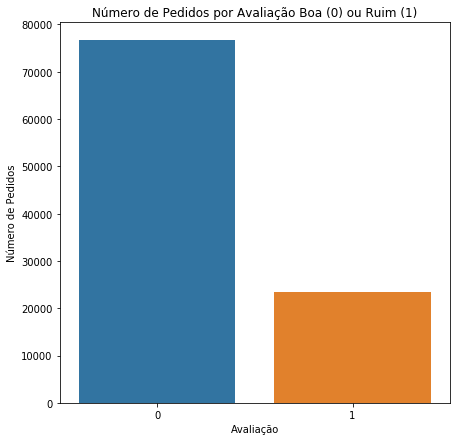

In [36]:
plt.figure(figsize=(7,7))

sns.countplot(class_2['nota'], order=class_2['nota'].value_counts().index.sort_values())
plt.title('Número de Pedidos por Avaliação Boa (0) ou Ruim (1)')
plt.xlabel('Avaliação')
plt.ylabel('Número de Pedidos');

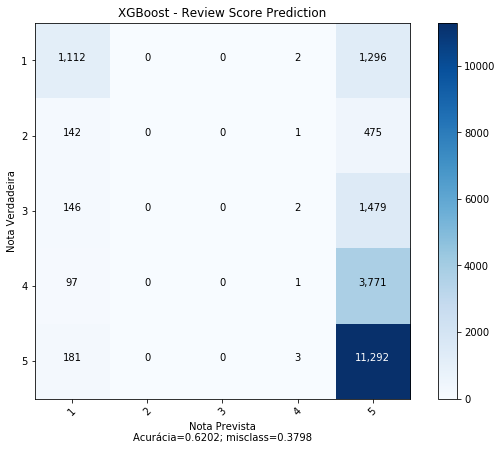

In [37]:
i=0
accuracy_xgb =[]
auc_mean = []
#Valor anterior realizado para 10000
while i < 1:
    X_train, X_test, y_train, y_test = train_test_split(class_5.drop('review_score',axis=1), 
                                                            class_5['review_score'], test_size=0.20, random_state=10)
    xgboost = XGBClassifier()
    xgboost.fit(X_train,y_train)

    predictions = np.array(xgboost.predict(X_test))
#     accuracy_xgb.append(accuracy_score(y_test, predictions))
    
#     auc_mean.append(roc_auc_score(y_test.astype(int),predictions.astype(int)))
    
    i+=1

plot_confusion_matrix5(cm=confusion_matrix(y_test,predictions), 
                              normalize    = False,
                              target_names = ['1', '2','3','4','5'],
                              title = 'XGBoost - Review Score Prediction')    

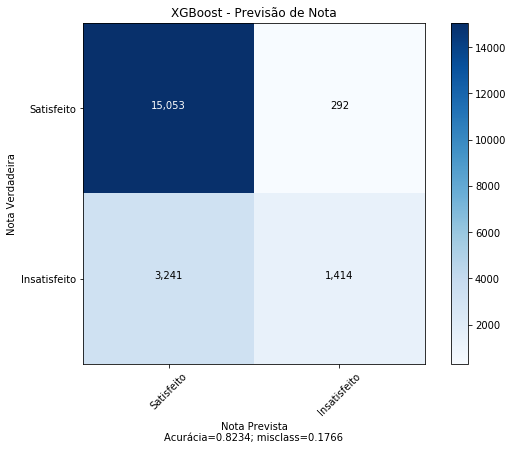

In [38]:
i=0
accuracy_xgb =[]
auc_mean = []
#Valor anterior realizado para 10000
while i < 1:
    X_train, X_test, y_train, y_test = train_test_split(class_2.drop('nota',axis=1), 
                                                            class_2['nota'], test_size=0.20, random_state=10)
    xgboost = XGBClassifier()
    xgboost.fit(X_train,y_train)

    predictions = np.array(xgboost.predict(X_test))
#     accuracy_xgb.append(accuracy_score(y_test, predictions))
    
#     auc_mean.append(roc_auc_score(y_test.astype(int),predictions.astype(int)))
    
    i+=1

plot_confusion_matrix(cm=confusion_matrix(y_test,predictions), 
                              normalize    = False,
                              target_names = ['Satisfeito', 'Insatisfeito'],
                              title = 'XGBoost - Previsão de Nota')    

# LGBM Classifiação e Regressão

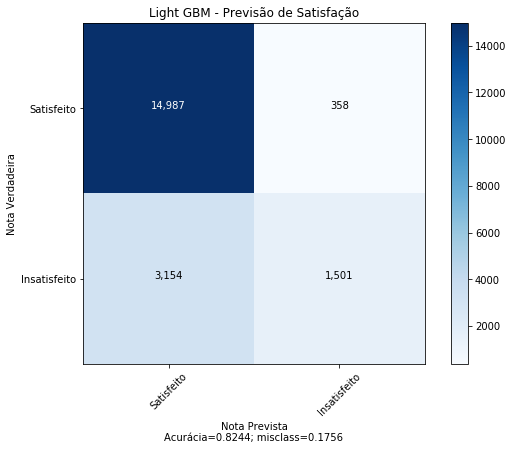

In [39]:
i=0
accuracy_lbm =[]
auc_mean = []
#Valor anterior realizado para 10000
while i < 1:
    X_train, X_test, y_train, y_test = train_test_split(class_2.drop('nota',axis=1), 
                                                            class_2['nota'], test_size=0.20, random_state=10)
    lbm = lgb.LGBMClassifier(
        n_estimators=300,
        num_leaves=15,
        colsample_bytree=.8,
        subsample=.8,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01
    )
    lbm.fit(X_train,y_train)

    predictions = np.array(lbm.predict(X_test))
#     accuracy_xgb.append(accuracy_score(y_test, predictions))
    
#     auc_mean.append(roc_auc_score(y_test.astype(int),predictions.astype(int)))
    
    i+=1

plot_confusion_matrix(cm=confusion_matrix(y_test,predictions), 
                              normalize    = False,
                              target_names = ['Satisfeito', 'Insatisfeito'],
                              title = 'Light GBM - Previsão de Satisfação')    

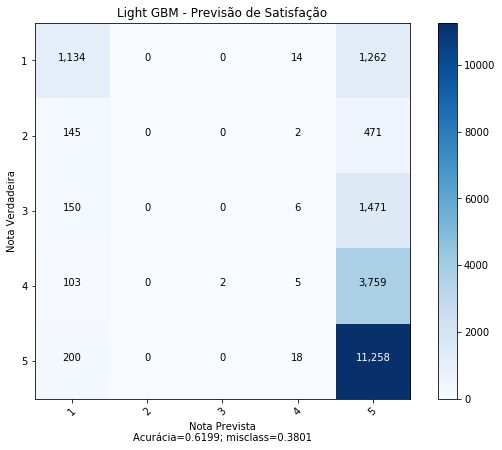

In [41]:
i=0
accuracy_lbm =[]
auc_mean = []
#Valor anterior realizado para 10000
while i < 1:
    X_train, X_test, y_train, y_test = train_test_split(class_5.drop('review_score',axis=1), 
                                                            class_5['review_score'], test_size=0.20, random_state=10)
    lbm = lgb.LGBMClassifier(
        n_estimators=300,
        num_leaves=15,
        colsample_bytree=.8,
        subsample=.8,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01
    )
    lbm.fit(X_train,y_train)

    predictions = np.array(lbm.predict(X_test))
#     accuracy_xgb.append(accuracy_score(y_test, predictions))
    
#     auc_mean.append(roc_auc_score(y_test.astype(int),predictions.astype(int)))
    
    i+=1

plot_confusion_matrix5(cm=confusion_matrix(y_test,predictions), 
                              normalize    = False,
                              target_names = ['1', '2','3','4','5'],
                              title = 'Light GBM - Previsão de Satisfação')    

In [42]:

X_train, X_test, y_train, y_test = train_test_split(xgb_reg.drop('review_score',axis=1), 
                                                            xgb_reg['review_score'], test_size=0.20,random_state=10)
    
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.5,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration);


[1]	valid_0's l1: 0.969324	valid_0's l2: 1.47116
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.926776	valid_0's l2: 1.37246
[3]	valid_0's l1: 0.90635	valid_0's l2: 1.34677
[4]	valid_0's l1: 0.895487	valid_0's l2: 1.33576
[5]	valid_0's l1: 0.890719	valid_0's l2: 1.33416
[6]	valid_0's l1: 0.88756	valid_0's l2: 1.33177
[7]	valid_0's l1: 0.885154	valid_0's l2: 1.33025
[8]	valid_0's l1: 0.8854	valid_0's l2: 1.33205
[9]	valid_0's l1: 0.884752	valid_0's l2: 1.33173
[10]	valid_0's l1: 0.885076	valid_0's l2: 1.33568
[11]	valid_0's l1: 0.885081	valid_0's l2: 1.33574
[12]	valid_0's l1: 0.884288	valid_0's l2: 1.33528
Early stopping, best iteration is:
[7]	valid_0's l1: 0.885154	valid_0's l2: 1.33025


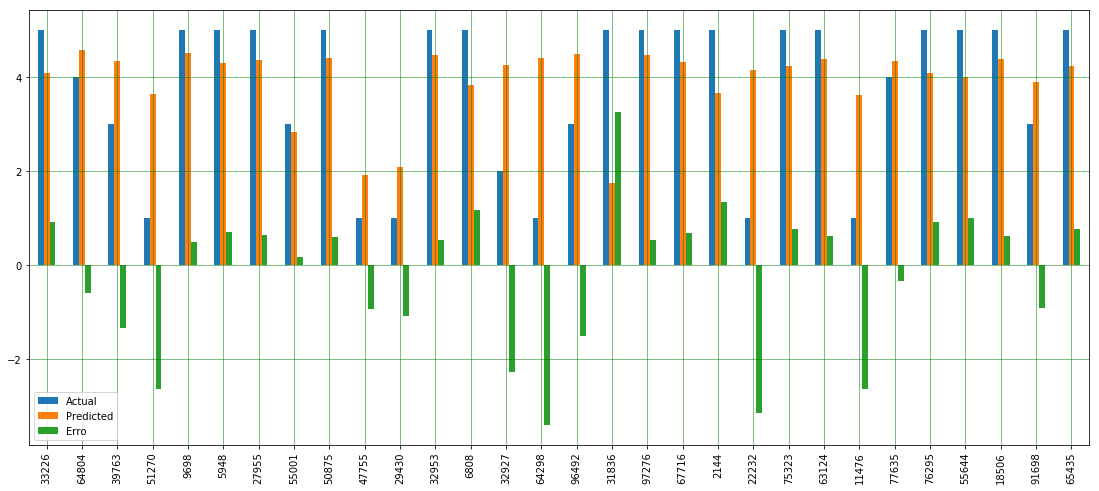

In [46]:
df_gbm = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_gbm['Erro'] = df_gbm['Actual'] - df_gbm['Predicted']
df_gbm.head(30).plot(kind='bar',figsize=(19,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

MAE: 0.8851541082314208
MSE: 1.3302504262229822
RMSE: 1.1533648278940112


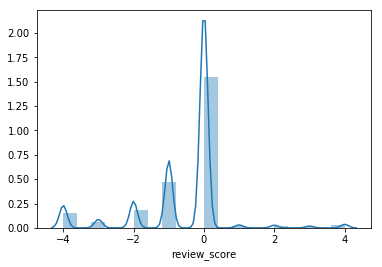

In [57]:
sns.distplot((y_test-predictions),bins=20);
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [58]:
print('RMSE Notas 1:', np.sqrt(metrics.mean_squared_error(df_gbm[df_gbm['Actual']==1]['Actual'], df_gbm[df_gbm['Actual']==1]['Predicted'])))
print('RMSE Notas 2:', np.sqrt(metrics.mean_squared_error(df_gbm[df_gbm['Actual']==2]['Actual'], df_gbm[df_gbm['Actual']==2]['Predicted'])))
print('RMSE Notas 3:', np.sqrt(metrics.mean_squared_error(df_gbm[df_gbm['Actual']==3]['Actual'], df_gbm[df_gbm['Actual']==3]['Predicted'])))
print('RMSE Notas 4:', np.sqrt(metrics.mean_squared_error(df_gbm[df_gbm['Actual']==4]['Actual'], df_gbm[df_gbm['Actual']==4]['Predicted'])))
print('RMSE Notas 5:', np.sqrt(metrics.mean_squared_error(df_gbm[df_gbm['Actual']==5]['Actual'], df_gbm[df_gbm['Actual']==5]['Predicted'])))

RMSE Notas 1: 2.350588678756182
RMSE Notas 2: 1.8993152169684893
RMSE Notas 3: 1.2269225498671978
RMSE Notas 4: 0.4961488758383978
RMSE Notas 5: 0.8168957351312932


In [59]:
df_gbm[(df_gbm['Actual']<=3)].shape

(4655, 3)

In [60]:
df_gbm[(df_gbm['Actual']>3)&(df_gbm['Predicted']<=3)].shape

(293, 3)

In [61]:
df_gbm[(df_gbm['Predicted']<=3)].shape

(1701, 3)

Classificação 2	TP	    FP	Total
Previsão 	    1226	297	1523
			
Classificação 5	TP	  FP	Total
Previsão 	    1204  274	1478
			
Regressão Nota	TP	  FP	Total
Previsão 	    1291  518	1809

Total = 19845